In [21]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.utils import plot_model
from common import sns_cm, plot_loss_accuracy, display_loss_accuracy
from sklearn.model_selection import train_test_split
import import_ipynb as ipynb
import os
import numpy as np

2.14.0


In [2]:
%%capture
os.chdir("../Lab 3")
net = ipynb.NotebookLoader().load_module('neural_networks')
os.chdir("../Lab 4")

### Training set

In [3]:
X = net.X
y = net.y

### Testing set

In [4]:
X_test = net.X_sample
y_test = net.y_sample_true

### Split training set into training and validation set.

In [5]:
def reshape(X, y, timestep):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=False)

    number_of_windows_train = X_train.shape[0] // timestep
    number_of_features_train = X_train.shape[1]

    number_of_windows_val = X_val.shape[0] // timestep
    number_of_features_val = X_val.shape[1]

    X_train_window = X_train[:number_of_windows_train*timestep,:]
    y_train_window = y_train[:number_of_windows_train*timestep,:]

    X_val_window = X_val[:number_of_windows_val*timestep,:]
    y_val_window = y_val[:number_of_windows_val*timestep,:]

    X_train_window= np.reshape(X_train_window, (number_of_windows_train, timestep, number_of_features_train))
    X_val_window = np.reshape(X_val_window, (number_of_windows_val, timestep, number_of_features_val))

    y_train_window = np.reshape(y_train_window, (number_of_windows_train, timestep, y_train.shape[1]))
    y_val_window = np.reshape(y_val_window, (number_of_windows_val, timestep, y_val.shape[1]))

    return X_train_window, X_val_window, y_train_window, y_val_window


## Classification of the four movement classes

### You should use RNN as a classifier. To save time we will just use the GRU neuron. Hyperparameters you can change for optimizing are:
##### — Number of neurons in each layer. You need to provide result for at least three different sizes of a layer
##### — Number of layers. We can limit ourself to 1 and 2 layers.
##### — Window length, You need to provide result for at least 3 different window lengths
##### This does mean that you need to train 2 x 3 x 3 models.

### Hyperparameters

In [6]:
neurons = [20, 40, 60, 80, 100]
layers = [1, 2, 3, 4, 5] 
time_steps = [128, 256, 512] # Number of previous time steps used to predict each step.

In [7]:
models = {}
histories = {}
sets = {}

model_10 = Sequential([
    Dense(units=10, activation='relu', input_shape=(len(features),)),
    Dense(units=10, activation='relu'),
    Dense(len(movement_classes), activation='softmax')
])

### Create the models

In [8]:
for n in neurons:
    for layer in layers:
        for timestep in time_steps:
            model = Sequential()
            
            X_train, X_val, y_train, y_val = reshape(X, y, timestep)

            model.add(
                GRU(
                    units=n,
                    return_sequences=True,
                    input_shape=(X_train.shape[1], X_train.shape[2])
                )
            )

            for _ in range(layer - 1):
                model.add(
                    GRU(
                        units=n,
                        activation='relu',
                        return_sequences=True))

            model.add(
            
                Dropout(
                    rate=0.3
                )
            )

            model.add(Dense(len(net.movement_classes), activation='softmax'))
            
            sets[f"model - neurons:{n}, layers: {layer}, win_len: {timestep}"] = (X_train, X_val, y_train, y_val)
            models[f"model - neurons:{n}, layers: {layer}, win_len: {timestep}"] = model
            

### Show the models

In [9]:
for model in models.values():
    model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gi

### Compile all models

In [10]:
for model in models.values():
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the models

In [11]:
epochs = 100

In [12]:
%%capture
for key, model in models.items():
    X_train, X_val, y_train, y_val = sets[key]
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs).history
    histories[key] = history

KeyboardInterrupt: 

### Plot loss and accuracy for validation and training set.

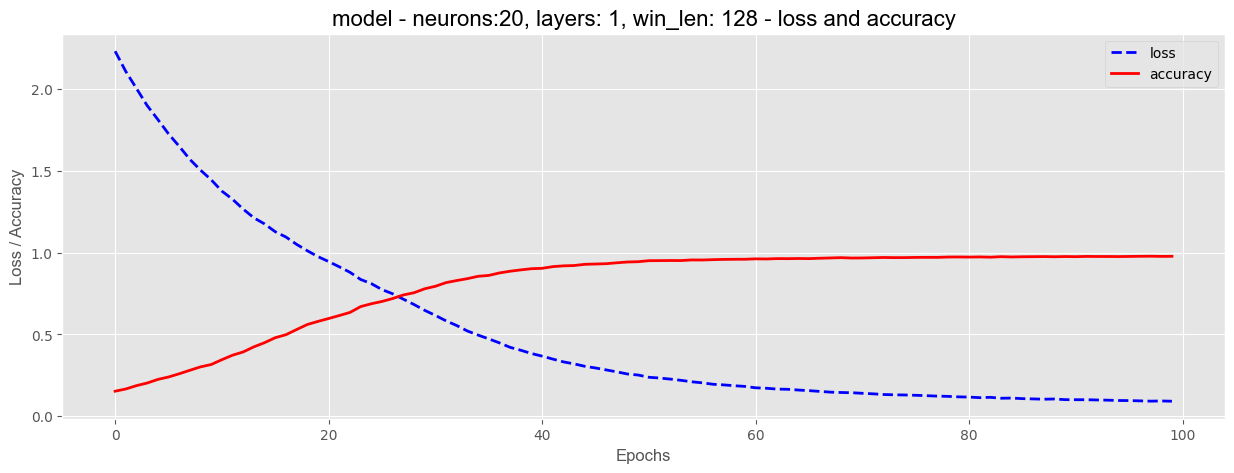

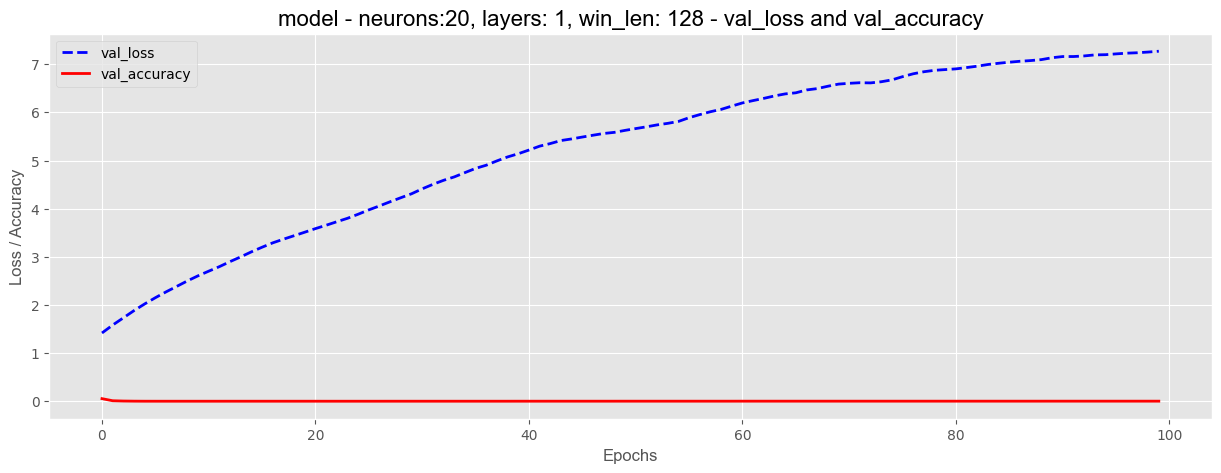

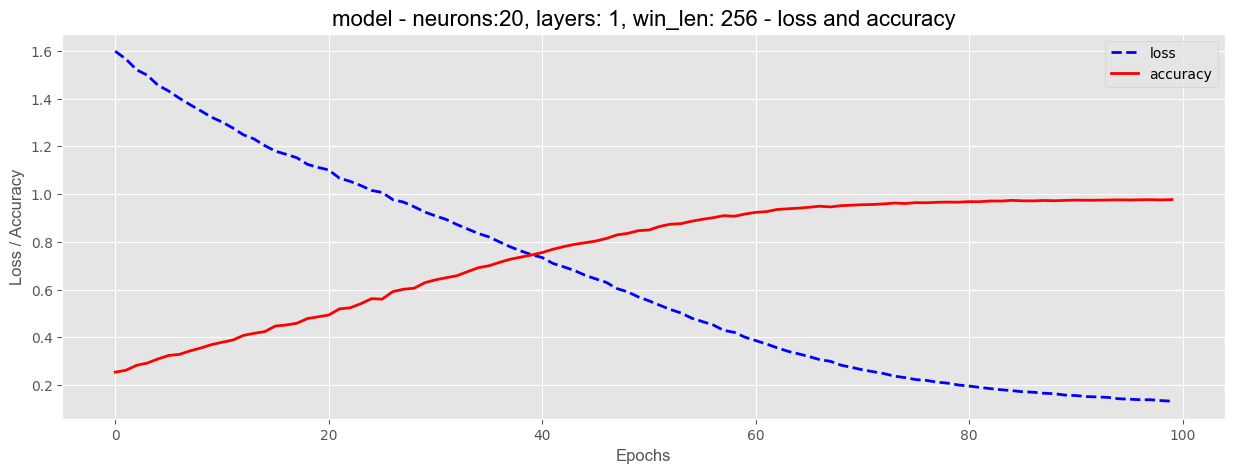

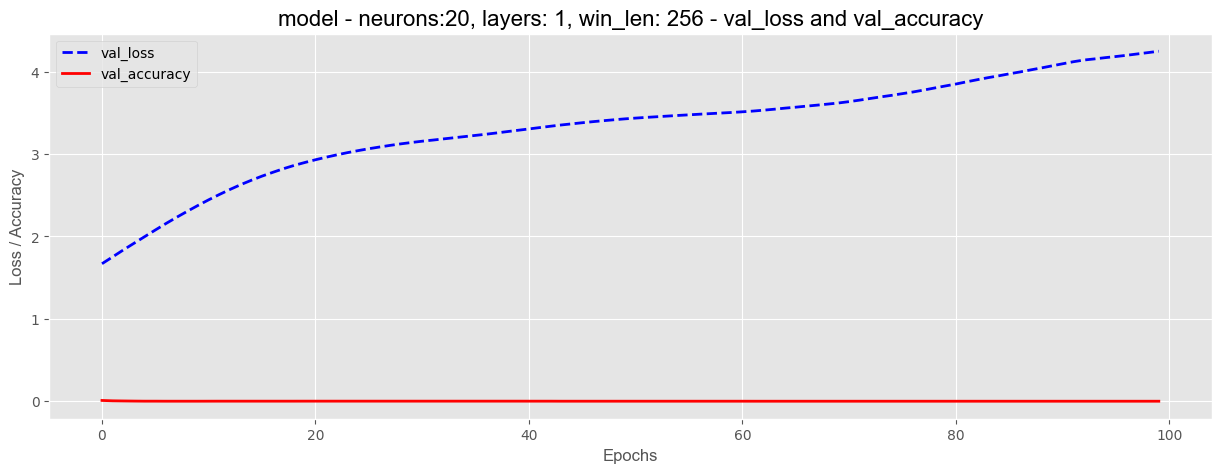

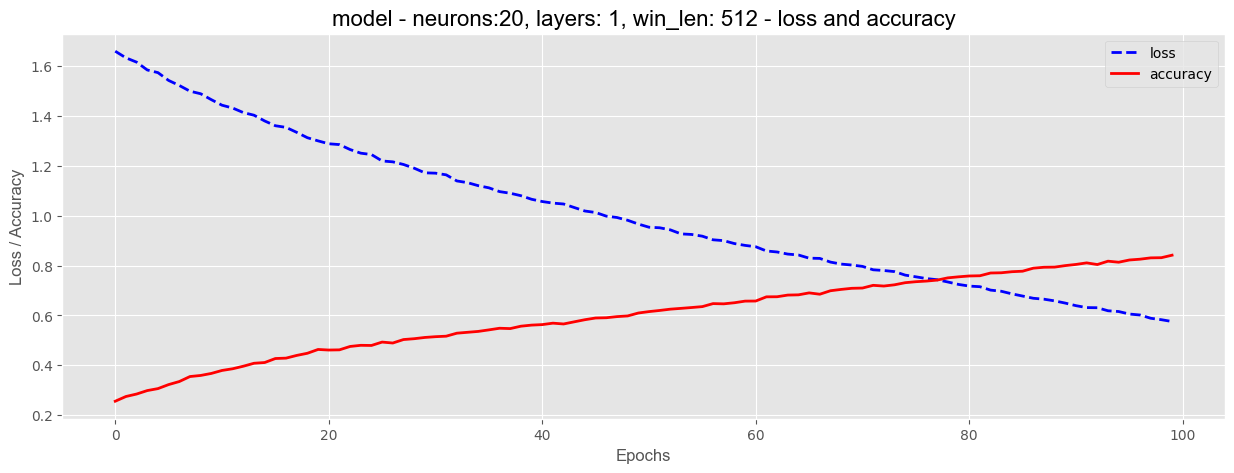

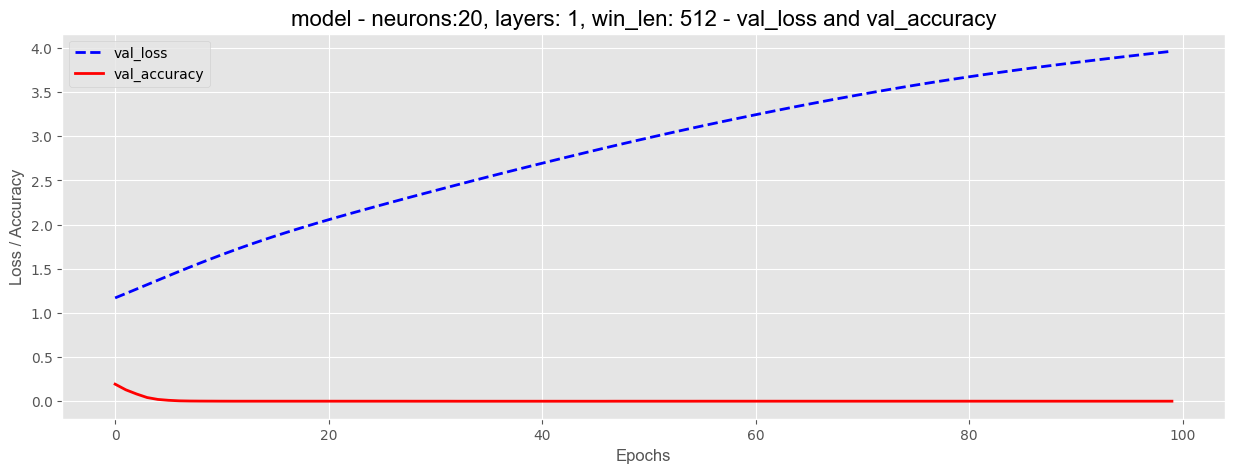

In [13]:
for key, history in histories.items():
    plot_loss_accuracy(history=history, name=key)

### Predications

In [14]:
%%capture
for key, model in models.items():
    predicated_probabilities = model.predict(X_test)
    sns_cm(y_true= y_test.argmax(axis=1), y_pred= predicated_probabilities.argmax(axis=1))
    plt.title(key)

ValueError: in user code:

    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 128, 6), found shape=(None, 6)


### Accuracies

In [15]:
for key, model in models.items():
    scores = model.evaluate(X_test, y_test)
    display_loss_accuracy(scores, title=key)

TypeError: in user code:

    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Sathwik kannam\Desktop\Other courses\Machine Learning with Data Acquisition\Labs\venv\lib\site-packages\keras\src\layers\rnn\gru.py", line 643, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'gru' (type GRU).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'gru' (type GRU):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
